### HAM 10000

* [Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T)

* [Original Paper](https://www.nature.com/articles/sdata2018161)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings_vlm/ham10000/'
FILE = 'embeddings_clip.csv'

FILE_PATH = os.path.join(PATH, FILE)

## Get data

In [3]:
df = pd.read_csv(FILE_PATH)
df.drop(columns=['text', 'image_id'], inplace=True)
df.head()

,dx,split,image_embedding_0,image_embedding_1,image_embedding_2,image_embedding_3,image_embedding_4,image_embedding_5,image_embedding_6,image_embedding_7,...,text_embedding_502,text_embedding_503,text_embedding_504,text_embedding_505,text_embedding_506,text_embedding_507,text_embedding_508,text_embedding_509,text_embedding_510,text_embedding_511
0,nv,train,0.017459,-0.006133,0.042509,0.032119,-0.020298,-0.029999,-0.019345,-0.005980,...,-0.085103,-0.035549,0.022616,0.014842,-0.010682,0.007425,-0.010183,0.059058,0.028891,0.073401
1,nv,train,0.013314,-0.004718,0.036896,0.013657,-0.018710,-0.000790,-0.018275,0.021898,...,-0.024121,0.001504,0.007381,0.028216,-0.033343,-0.007173,0.025764,0.037911,-0.028967,0.032034
2,akiec,train,0.023076,-0.006460,0.046531,-0.007525,-0.052272,0.024759,-0.004904,0.024593,...,-0.076046,-0.025927,0.019258,0.013950,-0.013910,0.000220,-0.016514,0.060165,0.028732,0.068683
3,nv,train,0.002341,-0.042092,0.056254,0.000176,-0.013943,0.011410,0.002411,0.001611,...,-0.017013,-0.020450,0.020093,0.021699,-0.018428,0.018907,0.022027,0.045309,-0.014772,0.017288
4,nv,train,0.012029,-0.003644,0.028491,0.017455,-0.017562,-0.005040,0.016783,0.031028,...,-0.093017,-0.022929,0.013042,0.007998,-0.020830,-0.015631,-0.007309,0.057171,0.030298,0.068561


## Data Perparation

In [4]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'dx'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)


### Models

In [5]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if label_columns == 'DR_2':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 0.50 MB
The number of parameters of the model are: 132359


STAGE:2024-02-08 15:40:54 17020:17020 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.7209, macro-f1: 0.5255
Epoch 1/15 - Training Time: 0.78 seconds | Inference Time: 0.18 seconds
Epoch 2/15 - Test Accuracy: 0.6615, macro-f1: 0.5152
Epoch 2/15 - Training Time: 0.66 seconds | Inference Time: 0.21 seconds
Epoch 3/15 - Test Accuracy: 0.7763, macro-f1: 0.6420
Epoch 3/15 - Training Time: 0.70 seconds | Inference Time: 0.18 seconds
Epoch 4/15 - Test Accuracy: 0.7414, macro-f1: 0.5726
Epoch 4/15 - Training Time: 0.64 seconds | Inference Time: 0.19 seconds
Epoch 5/15 - Test Accuracy: 0.7923, macro-f1: 0.6363
Epoch 5/15 - Training Time: 0.59 seconds | Inference Time: 0.19 seconds
Epoch 6/15 - Test Accuracy: 0.7943, macro-f1: 0.6155
Epoch 6/15 - Training Time: 0.62 seconds | Inference Time: 0.18 seconds
Epoch 7/15 - Test Accuracy: 0.7084, macro-f1: 0.5928
Epoch 7/15 - Training Time: 0.64 seconds | Inference Time: 0.20 seconds
Epoch 8/15 - Test Accuracy: 0.7753, macro-f1: 0.6435
Epoch 8/15 - Training Time: 0.62 seconds | Inference Time: 0.19 seconds


STAGE:2024-02-08 15:41:09 17020:17020 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-08 15:41:09 17020:17020 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         9.85%        1.118s        54.77%        6.219s       3.290ms    -471.49 Mb    -479.43 Mb          1890  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        38.81%        4.407s        39.41%        4.474s       1.864ms     589.91 Mb     588.99 Mb          2400  
                              Optimizer.step#AdamW.step         6.55%     743.180ms        20.95%        2.378s       1.258ms       1.01 Mb      -1.85

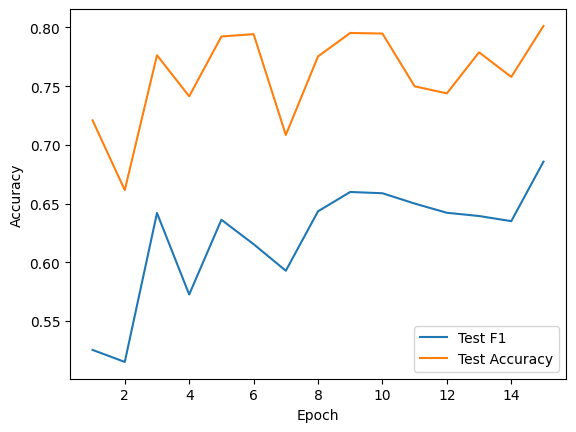

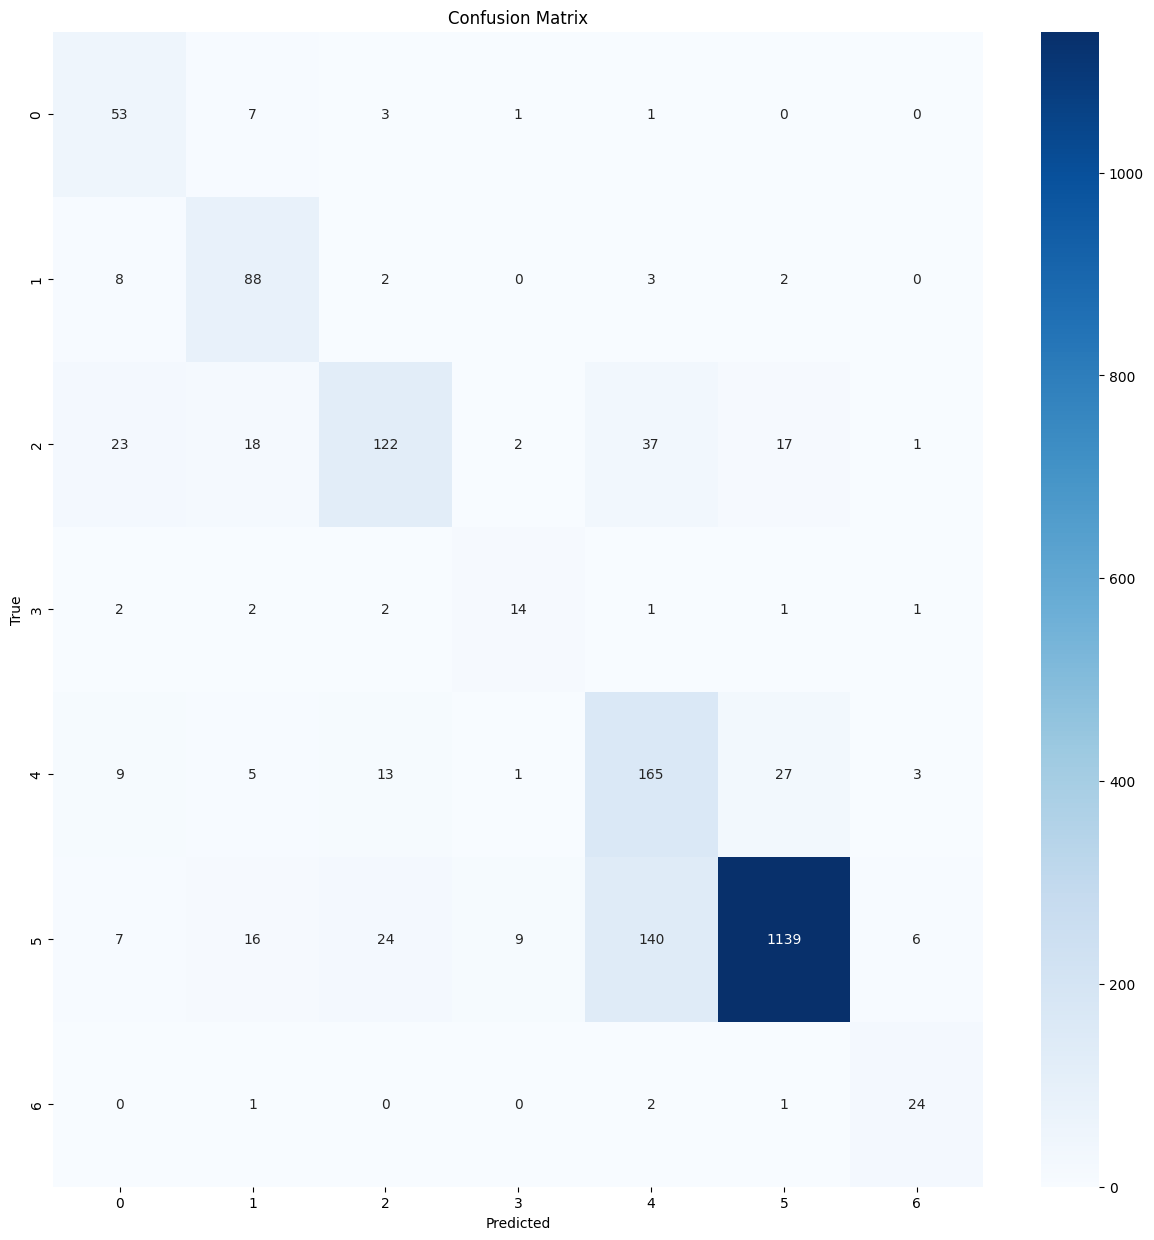

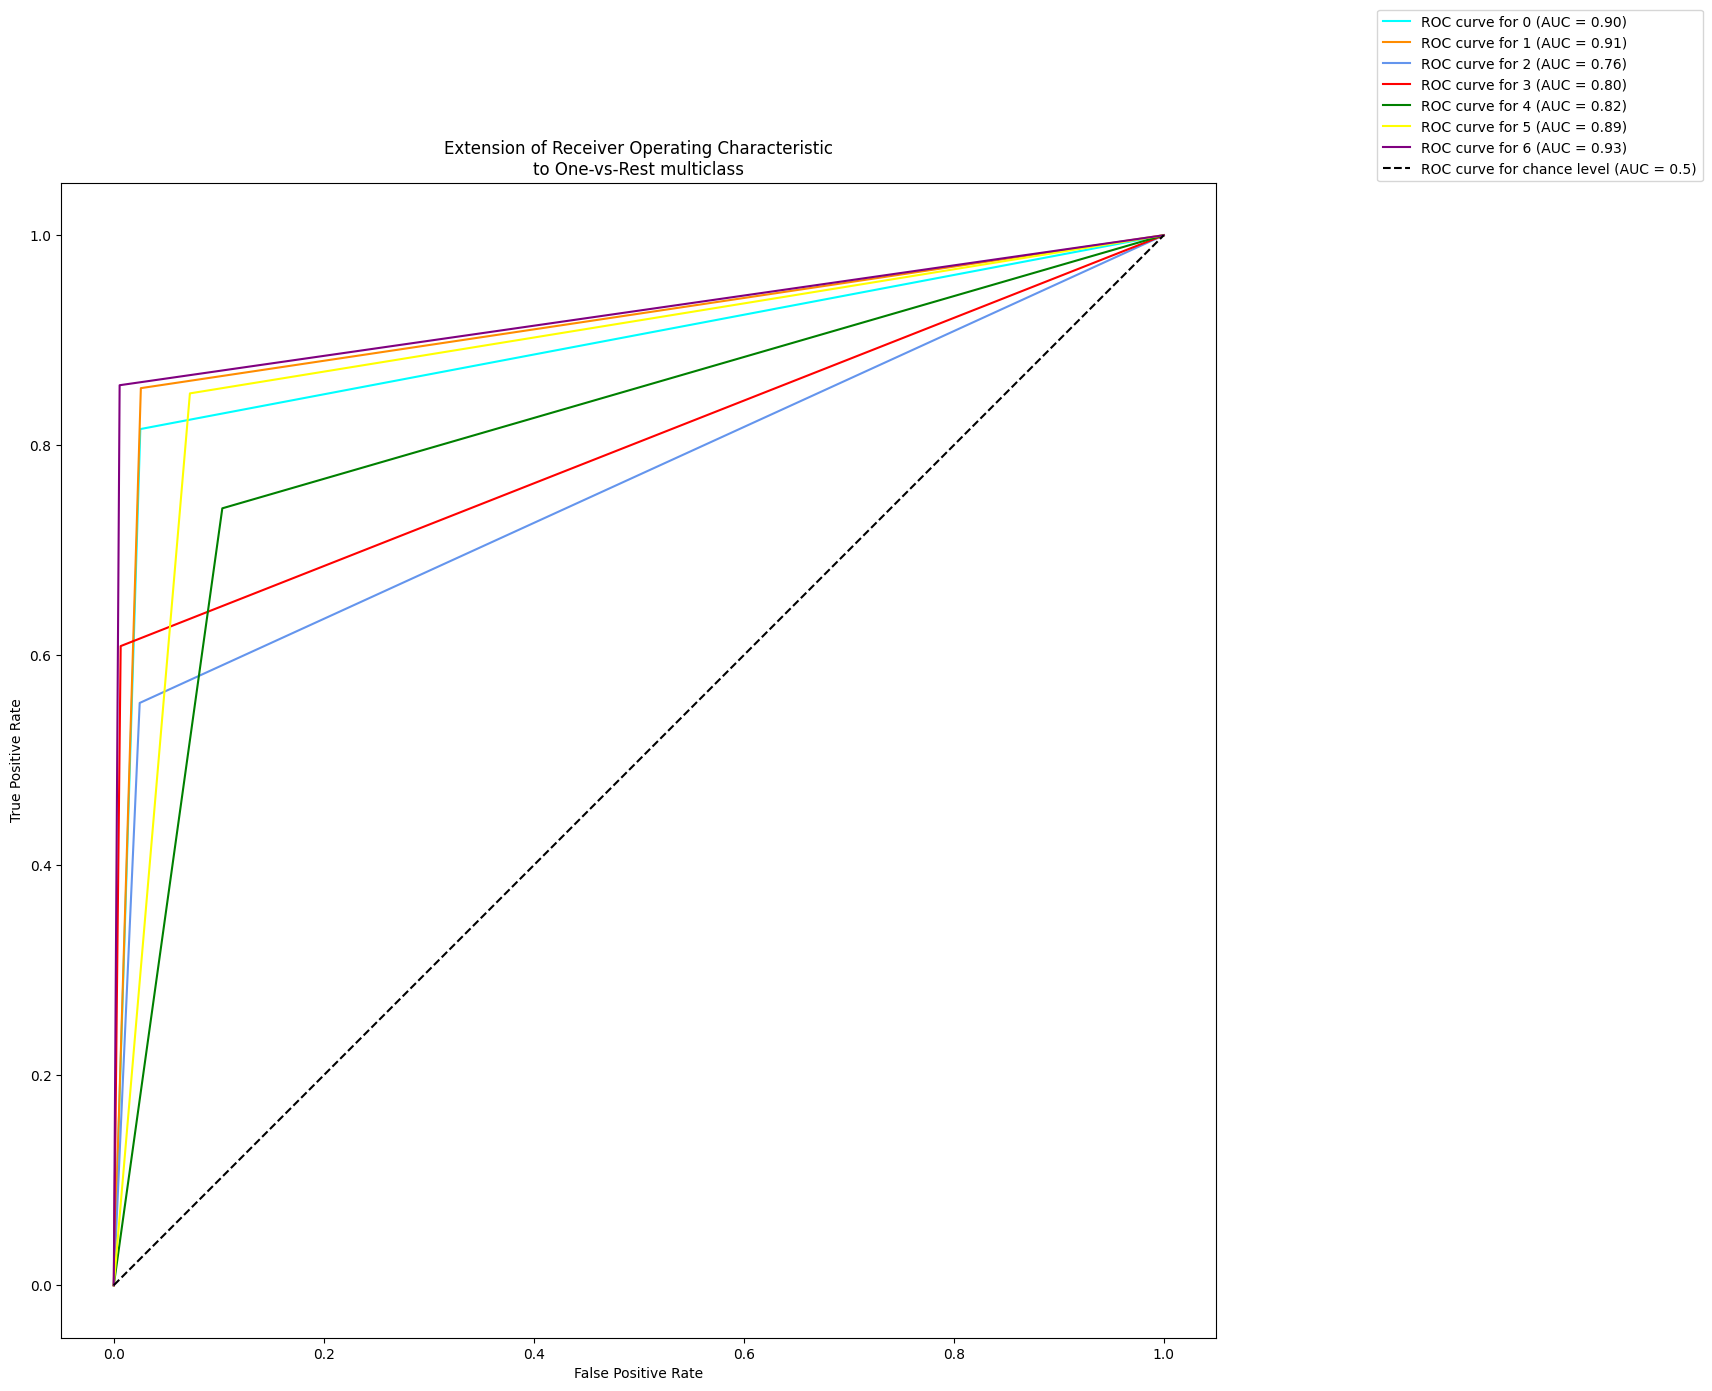

              precision    recall  f1-score   support

           0       0.52      0.82      0.63        65
           1       0.64      0.85      0.73       103
           2       0.73      0.55      0.63       220
           3       0.52      0.61      0.56        23
           4       0.47      0.74      0.58       223
           5       0.96      0.85      0.90      1341
           6       0.69      0.86      0.76        28

    accuracy                           0.80      2003
   macro avg       0.65      0.75      0.69      2003
weighted avg       0.84      0.80      0.81      2003



In [6]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True)

Training Late Fusion Model:
Model Memory Usage: 0.25 MB
The number of parameters of the model are: 66823


STAGE:2024-02-08 15:42:28 17020:17020 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.6385, macro-f1: 0.4870
Epoch 1/15 - Training Time: 0.99 seconds | Inference Time: 0.30 seconds
Epoch 2/15 - Test Accuracy: 0.7059, macro-f1: 0.5646
Epoch 2/15 - Training Time: 1.04 seconds | Inference Time: 0.33 seconds
Epoch 3/15 - Test Accuracy: 0.7888, macro-f1: 0.6335
Epoch 3/15 - Training Time: 1.10 seconds | Inference Time: 0.30 seconds
Epoch 4/15 - Test Accuracy: 0.7868, macro-f1: 0.6405
Epoch 4/15 - Training Time: 1.06 seconds | Inference Time: 0.31 seconds
Epoch 5/15 - Test Accuracy: 0.7639, macro-f1: 0.6104
Epoch 5/15 - Training Time: 1.07 seconds | Inference Time: 0.30 seconds
Epoch 6/15 - Test Accuracy: 0.7399, macro-f1: 0.6239
Epoch 6/15 - Training Time: 1.05 seconds | Inference Time: 0.32 seconds
Epoch 7/15 - Test Accuracy: 0.7544, macro-f1: 0.6659
Epoch 7/15 - Training Time: 1.06 seconds | Inference Time: 0.34 seconds
Epoch 8/15 - Test Accuracy: 0.7678, macro-f1: 0.6357
Epoch 8/15 - Training Time: 0.97 seconds | Inference Time: 0.31 seconds


STAGE:2024-02-08 15:42:51 17020:17020 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-08 15:42:51 17020:17020 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         8.66%        1.382s        65.13%       10.400s       4.388ms    -588.40 Mb    -596.86 Mb          2370  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        34.42%        5.496s        34.83%        5.561s       2.317ms     589.91 Mb     588.99 Mb          2400  
                              Optimizer.step#AdamW.step         6.31%        1.007s        31.42%        5.016s       2.654ms     522.09 Kb    -945.79

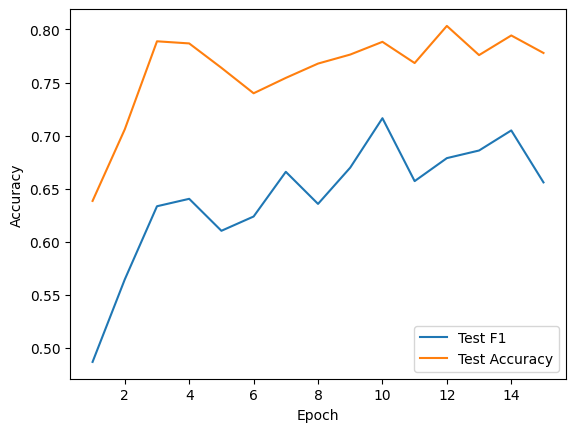

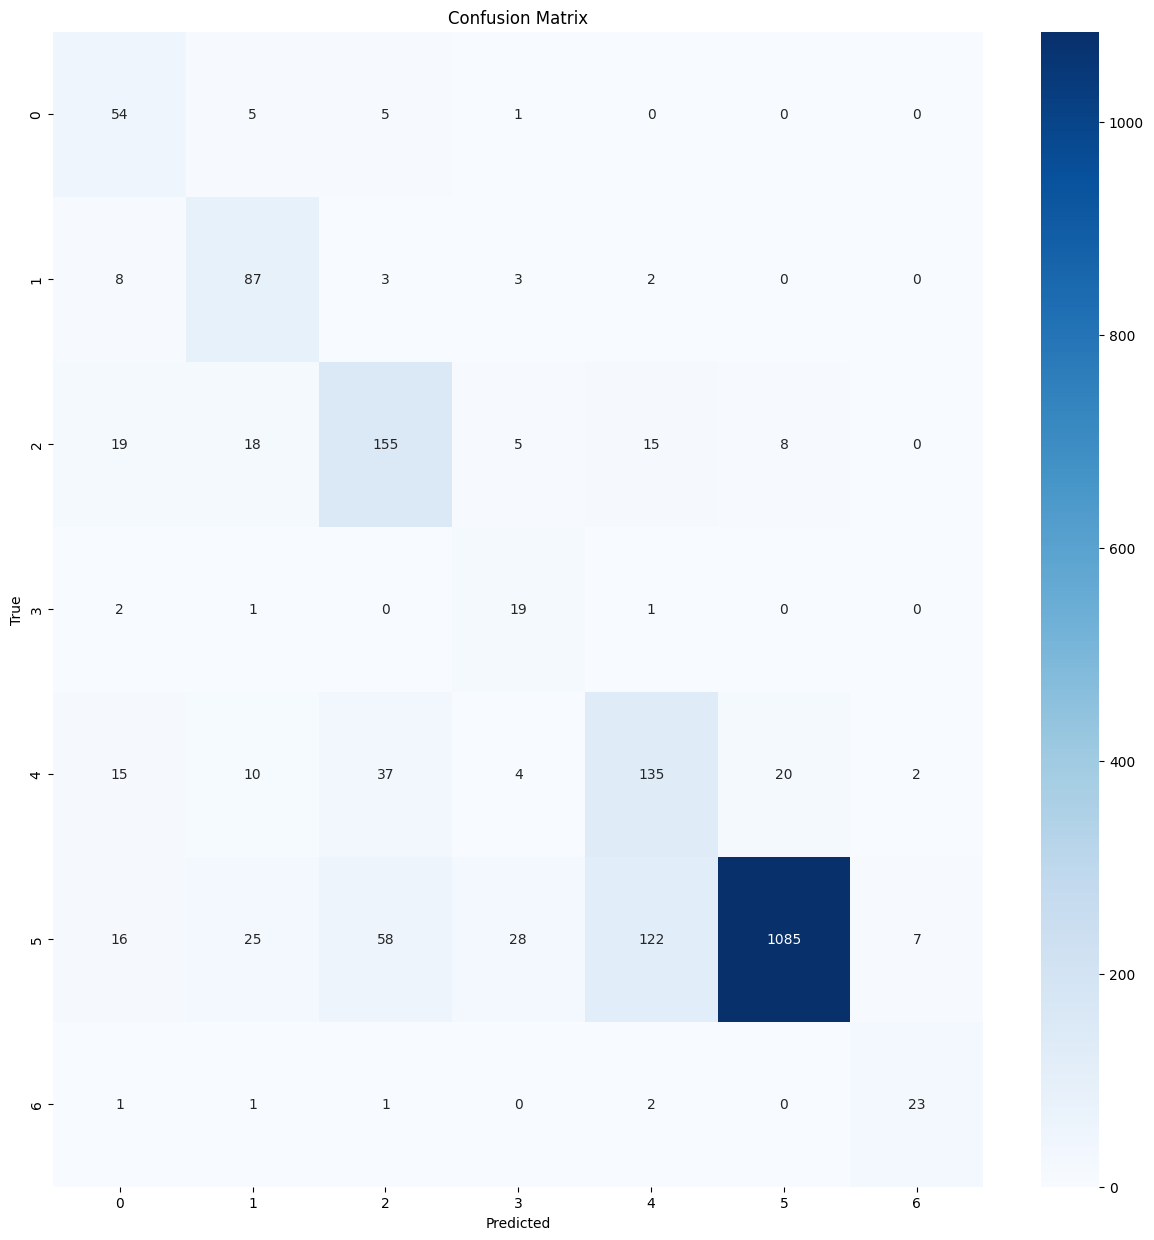

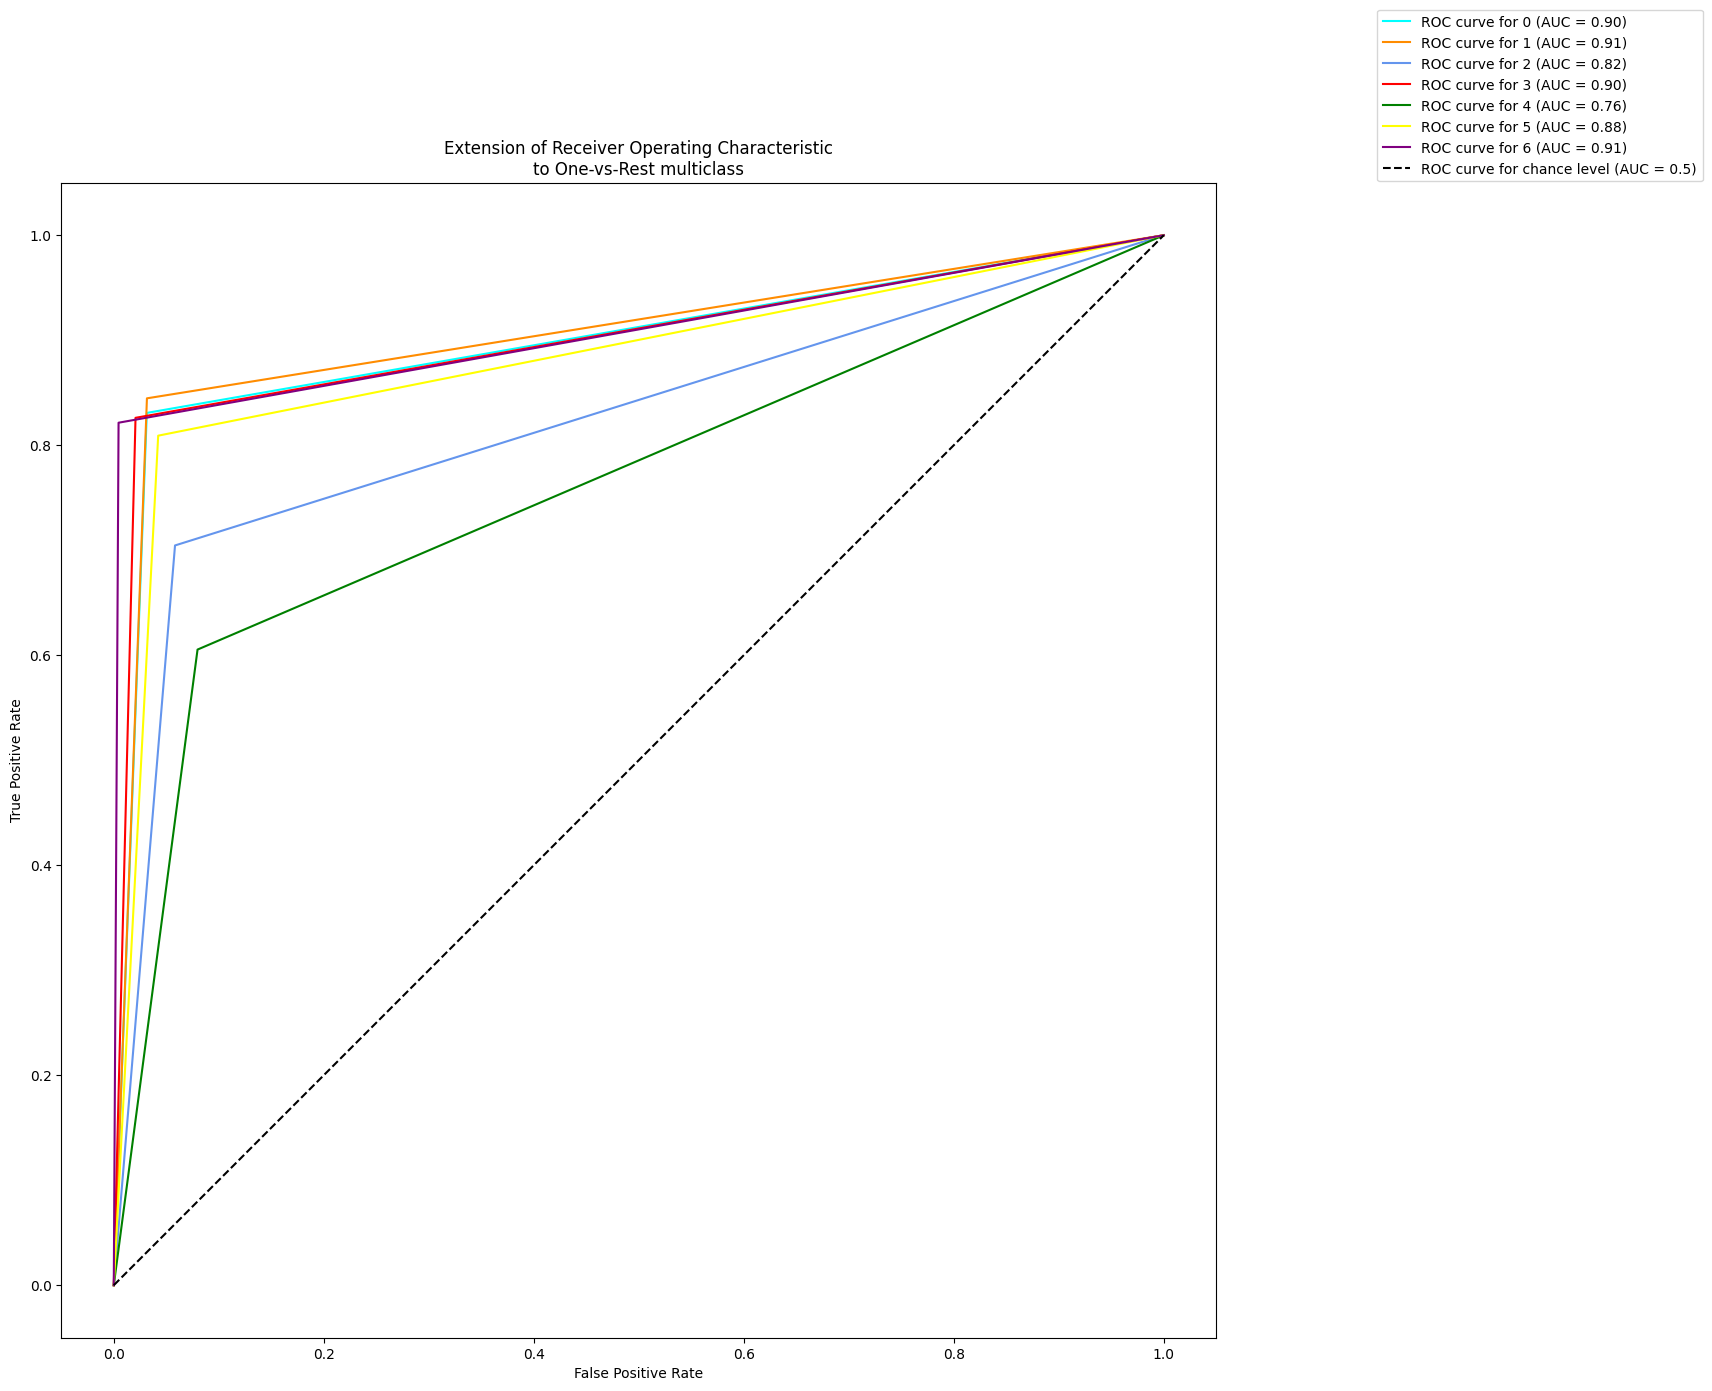

              precision    recall  f1-score   support

           0       0.47      0.83      0.60        65
           1       0.59      0.84      0.70       103
           2       0.60      0.70      0.65       220
           3       0.32      0.83      0.46        23
           4       0.49      0.61      0.54       223
           5       0.97      0.81      0.88      1341
           6       0.72      0.82      0.77        28

    accuracy                           0.78      2003
   macro avg       0.59      0.78      0.66      2003
weighted avg       0.83      0.78      0.79      2003



In [7]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True)